In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')



In [2]:
# File to Load (Remember to Change These)
mousedata=pd.read_csv("data/mouse_drug_data.csv")
clinicaldata=pd.read_csv("data/clinicaltrial_data.csv")

# Read the Mouse and Drug Data and the Clinical Trial Data
mousedata.head()
clinicaldata.head()

# Combine the data into a single dataset
combineddata = pd.merge(clinicaldata, mousedata,  on="Mouse ID", how="left")

# Display the data table for preview

combineddata.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
combineddata = combineddata.rename(columns={"Tumor Volume (mm3)":"Tumor Volume"})
tumordata=combineddata.groupby(['Drug', 'Timepoint',]).mean()

tumoravg=tumordata['Tumor Volume']

# Convert to DataFrame


dfTA=pd.DataFrame(tumoravg)
# Preview DataFrame
dfTA

Tumor Volume
Drug      Timepoint              
Capomulin 0             45.000000
          5             44.266086
          10            43.084291
          15            42.064317
          20            40.716325
...                           ...
Zoniferol 25            55.432935
          30            57.713531
          35            60.089372
          40            62.916692
          45            65.960888

[100 rows x 1 columns]

In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
standard_errors=combineddata.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume"]

# Convert to DataFrame
dfSEM=pd.DataFrame(standard_errors)
# Preview DataFrame

dfSEM


Tumor Volume
Drug      Timepoint              
Capomulin 0              0.000000
          5              0.448593
          10             0.702684
          15             0.838617
          20             0.909731
...                           ...
Zoniferol 25             0.602513
          30             0.800043
          35             0.881426
          40             0.998515
          45             1.003576

[100 rows x 1 columns]

In [5]:
# Minor Data Munging to Re-Format the Data Frames
dfSEM=dfSEM.reset_index()
dfSEM2=dfSEM.pivot(index="Timepoint", columns="Drug")["Tumor Volume"]


dfTA=dfTA.reset_index()
dfTA2=dfTA.pivot(index="Timepoint", columns="Drug")["Tumor Volume"]

# Preview that Reformatting worked
dfTA2

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


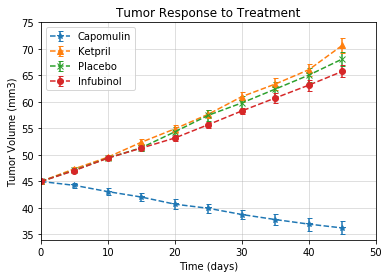

In [6]:
# Generate the Plot (with Error Bars)
plt.errorbar(dfTA2.index, dfTA2["Capomulin"], yerr = dfSEM2["Capomulin"], fmt = '*--', capsize = 2.5, label = "Capomulin")
plt.errorbar(dfTA2.index, dfTA2["Ketapril"], yerr = dfSEM2["Ketapril"], fmt = '^--', capsize = 2.5, label = "Ketpril")
plt.errorbar(dfTA2.index, dfTA2["Placebo"], yerr = dfSEM2["Placebo"], fmt = 'x--', capsize = 2.5, label = "Placebo")
plt.errorbar(dfTA2.index, dfTA2["Infubinol"], yerr = dfSEM2["Infubinol"], fmt = 'o--', capsize = 2.5, label = "Infubinol")

# legend
plt.legend(loc="best")

# gridlines
plt.grid(alpha = 0.5)

# labels
plt.title('Tumor Response to Treatment')
plt.xlabel('Time (days)')
plt.ylabel('Tumor Volume (mm3)')

# x limits and y limits
plt.xlim(0,50)
plt.ylim(34,75)
# Save the Figure
plt.savefig("../Images/TumorResponseToTreatment.png")
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [31]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

metdata=combineddata.groupby(['Drug', 'Timepoint',]).mean()
metavg=metdata['Metastatic Sites']


# Convert to DataFrame
dfMA=pd.DataFrame(metavg)
# Preview DataFrame
dfMA

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
...                               ...
Zoniferol 25                 1.687500
          30                 1.933333
          35                 2.285714
          40                 2.785714
          45                 3.071429

[100 rows x 1 columns]

In [32]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
standard_errors=combineddata.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]

# Convert to DataFrame
dfME=pd.DataFrame(standard_errors)
# Convert to DataFrame

# Preview DataFrame
dfME

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
...                               ...
Zoniferol 25                 0.236621
          30                 0.248168
          35                 0.285714
          40                 0.299791
          45                 0.286400

[100 rows x 1 columns]

In [33]:
# Minor Data Munging to Re-Format the Data Frames
dfMA=dfMA.reset_index()
dfMA2=dfMA.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]


dfME=dfME.reset_index()
dfME2=dfME.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

# Preview that Reformatting worked

dfMA2


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


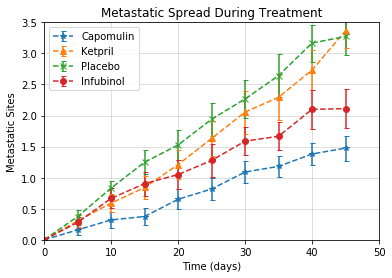

In [35]:
# Generate the Plot (with Error Bars)

plt.errorbar(dfMA2.index, dfMA2["Capomulin"], yerr = dfME2["Capomulin"], fmt = '*--', capsize = 2.5, label = "Capomulin")
plt.errorbar(dfMA2.index, dfMA2["Ketapril"], yerr = dfME2["Ketapril"], fmt = '^--', capsize = 2.5, label = "Ketpril")
plt.errorbar(dfMA2.index, dfMA2["Placebo"], yerr = dfME2["Placebo"], fmt = 'x--', capsize = 2.5, label = "Placebo")
plt.errorbar(dfMA2.index, dfMA2["Infubinol"], yerr = dfME2["Infubinol"], fmt = 'o--', capsize = 2.5, label = "Infubinol")

# legend
plt.legend(loc="best")

# gridlines
plt.grid(alpha = 0.5)

# labels
plt.title('Metastatic Spread During Treatment')
plt.xlabel('Time (days)')
plt.ylabel('Metastatic Sites')

# x limits and y limits
plt.xlim(0,50)
plt.ylim(0.0,3.5)

# Save the Figure

plt.savefig("../Images/MetastaticSpreadToTreatment.png")
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
df=combineddata.groupby(['Drug', 'Timepoint']).count()
mousecount=df['Mouse ID']

# Convert to DataFrame
dfMC=pd.DataFrame(mousecount)
# Preview DataFrame
dfMC


Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23
...                       ...
Zoniferol 25               16
          30               15
          35               14
          40               14
          45               14

[100 rows x 1 columns]

In [36]:
# Minor Data Munging to Re-Format the Data Frames
dfMC=dfMC.reset_index()
dfMC2=dfMC.pivot(index="Timepoint", columns="Drug")["Mouse ID"]



# Preview that Reformatting worked

dfMC2



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


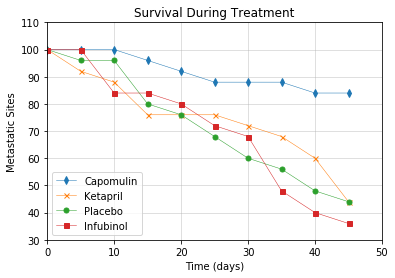

In [38]:
# Generate the Plot (Accounting for percentages)

plt.plot(dfMC2.index, 100*dfMC2["Capomulin"]/25, marker = 'd', markersize=5, linewidth=0.50, label = "Capomulin")
plt.plot(dfMC2.index, 100*dfMC2["Ketapril"]/25, marker = 'x', markersize=5, linewidth=0.50, label = "Ketapril")
plt.plot(dfMC2.index, 100*dfMC2["Placebo"]/25, marker = 'o', markersize=5, linewidth=0.50, label = "Placebo")
plt.plot(dfMC2.index, 100*dfMC2["Infubinol"]/25, marker = 's', markersize=5, linewidth=0.50, label = "Infubinol")
# legend
plt.legend(loc="best")

# gridlines
plt.grid(alpha = 0.5)

# labels
plt.title('Survival During Treatment')
plt.xlabel('Time (days)')
plt.ylabel('Metastatic Sites')

# x limits and y limits
plt.xlim(0,50)
plt.ylim(30,110)
# Save the Figure
plt.savefig("../Images/SurvivalDuringTreatment.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [23]:
# Display the data to confirm
dfTA3=dfTA2[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]

volchange=(dfTA3.iloc[-1]-dfTA3.iloc[0])/dfTA3.iloc[0]*100
volchange

Drug
Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64

In [24]:
# Store all Relevant Percent Changes into a Tuple

tuple1=(volchange["Capomulin"], volchange["Infubinol"],volchange["Ketapril"],volchange["Placebo"])
tuple1

(-19.475302667894173, 46.12347172785184, 57.028794686606076, 51.29796048315153)

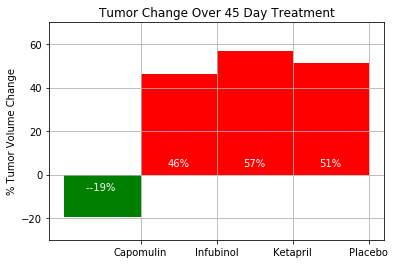

In [41]:
# Splice the data between passing and failing drugs

fig, ax = plt.subplots()
ind = np.arange(len(tuple1))
width = 1
rectsPass = ax.bar(ind[0], tuple1[0], width, color='green')
rectsFail = ax.bar(ind[1:], tuple1[1:], width, color='red')
# Orient widths. Add labels, tick marks, etc.
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
ax.grid(True)
# Use functions to label the percentages of changes - got help from my tutor Donish Cushing for this
def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="white")
def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8,
                '-%d%% ' % int(height),
                ha='center', va='bottom', color="white")
# Call functions to implement the function calls
autolabelPass(rectsPass)
autolabelFail(rectsFail)
# Save the Figure
fig.savefig("../Images/TumorPercentageChangeDuringTreatment.png")
# Show the Figure



fig.show()


![Metastatic Spread During Treatment](../Images/change.png)